In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
import os

In [2]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium Basic'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium Basic'
matplotlib.rcParams['mathtext.it'] = 'Gentium Basic:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium Basic:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

In [3]:
dat = pd.read_csv('df_merged_analysis.csv')
print(dat.columns)
dat = dat.rename(mapper={'date' : 'Date'}, axis=1)
dat = dat[['statefips', 'Date', 'positiveIncrease', 'deathIncrease', 'hospitalizedIncrease', 'Rt']]
print(dat['Date'].value_counts().sort_index())

Index(['Unnamed: 0', 'statefips', 'date', 'Stringency', 'positiveIncrease',
       'deathIncrease', 'hospitalizedIncrease',
       'totalTestsPeopleViralIncrease', 'statename', 'shadow_index_normalized',
       'Rt', 'ContainmentHealthIndex'],
      dtype='object')
2020-03-07    49
2020-03-08    51
2020-03-09    51
2020-03-10    51
2020-03-11    51
              ..
2021-01-22    51
2021-01-23    51
2021-01-24    51
2021-01-25    51
2021-01-26    51
Name: Date, Length: 326, dtype: int64


In [6]:
#dir = '../data/'
print(dat.columns)
mobility_dat = pd.read_csv('mobility_and_stringency.csv')
print(mobility_dat['Date'].value_counts().sort_index())
print(mobility_dat.columns)
state_dat = pd.read_csv('State Characteristics - State Characteristics.csv')
mobility_dat = mobility_dat.merge(state_dat, on=['statefips', 'statename', 'stateabbrev'])
#merged_dat = dat.merge(mobility_dat, on=['statefips', 'Date'], indicator='_merge', how='left')
merged_dat = mobility_dat.merge(dat, on=['statefips', 'Date'], indicator='_merge', how='left')
print(merged_dat.loc[merged_dat['_merge']=='left_only', 'Date'].value_counts().sort_index())
print(merged_dat['_merge'].value_counts())
merged_dat.loc[merged_dat['_merge']=='right_only', ['Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt']] = np.nan
#merged_dat = merged_dat.loc[merged_dat['_merge'] == 'both']
print(merged_dat)
print(merged_dat['Date'].value_counts().sort_index())

Index(['statefips', 'Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt'],
      dtype='object')
2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 391, dtype: int64
Index(['Unnamed: 0', 'statename', 'Date', 'StringencyIndex',
       'ContainmentHealthIndex', 'statefips', 'stateabbrev',
       'shadow_index_normalized'],
      dtype='object')
2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 66, dtype: int64
both          16624
left_only      3317
right_only        0
Name: _merge, dtype: int64
       Unnamed: 0 statename        Date  StringencyIndex  \
0              31    Alaska  2020-02-01             5.56   
1              32    Alaska  2020-02-02 

In [7]:
print(dat.columns)
print(dat)

Index(['statefips', 'Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt'],
      dtype='object')
       statefips        Date  positiveIncrease  deathIncrease  \
0              1  2020-03-07               0.0            0.0   
1              1  2020-03-08               0.0            0.0   
2              1  2020-03-09               0.0            0.0   
3              1  2020-03-10               0.0            0.0   
4              1  2020-03-11               0.0            0.0   
...          ...         ...               ...            ...   
16619         56  2021-01-22             159.0           21.0   
16620         56  2021-01-23               0.0            0.0   
16621         56  2021-01-24             315.0            0.0   
16622         56  2021-01-25             164.0            0.0   
16623         56  2021-01-26              90.0           25.0   

       hospitalizedIncrease        Rt  
0                       0.0  2.058230  
1             

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 391, dtype: int64


findfont: Font family ['Gentium Basic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gentium Basic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gentium Basic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


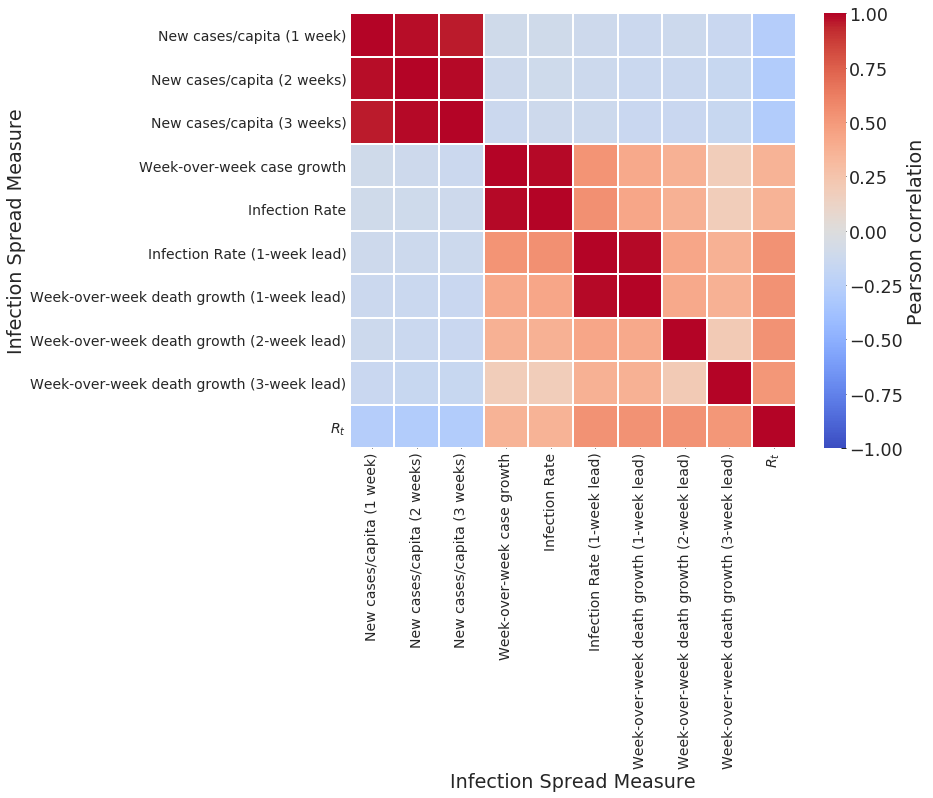

In [8]:
### READY FOR FINAL PLOT @SHERIDAN GREEN

def create_rolling_sum(data, varname, groupby, num_periods):
    ser = data[[varname, groupby]]
    to_sum = []
    for i in range(num_periods):
        ser.loc[:,varname + '_lag_' + str(i)] = ser.groupby(groupby)[varname].shift(i)
        to_sum = to_sum + [varname + '_lag_' + str(i)]
    return ser[to_sum].sum(axis=1)

horizons = [7,14,21,28]
vars_to_avg = ['positiveIncrease', 'hospitalizedIncrease', 'deathIncrease']
new_names = ['newcases', 'newhospital', 'newdeaths']

all_vars = []
for name,var in zip(new_names, vars_to_avg):
    for h in horizons:
        merged_dat.loc[:,name+'_past'+str(h)] = create_rolling_sum(merged_dat, var, 'statefips', h)
        all_vars += [name+'_past'+str(h)]
        merged_dat[name+'_past'+str(h)+'_lag7'] = merged_dat.groupby('statefips')[name+'_past'+str(h)].shift(7)

merged_dat['newcases_past7_WoWgrowth'] = merged_dat['newcases_past7'] / merged_dat['newcases_past7_lag7']
merged_dat['newdeaths_past7_WoWgrowth'] = merged_dat['newdeaths_past7'] / merged_dat['newdeaths_past7_lag7']
merged_dat['infectivity'] = merged_dat['newcases_past7'] / merged_dat['newcases_past28_lag7']
merged_dat['newcases_past7_WoWgrowth_lead7'] = merged_dat.groupby('statefips')['newcases_past7_WoWgrowth'].shift(-7)
merged_dat['infectivity_lead7'] = merged_dat.groupby('statefips')['infectivity'].shift(-7)
merged_dat['newdeaths_past7_WoWgrowth_lead14'] = merged_dat.groupby('statefips')['newdeaths_past7_WoWgrowth'].shift(-14)
merged_dat['newdeaths_past7_WoWgrowth_lead21'] = merged_dat.groupby('statefips')['newdeaths_past7_WoWgrowth'].shift(-21)

merged_dat['adherence_ratio'] = merged_dat['shadow_index_normalized'] / merged_dat['ContainmentHealthIndex']
merged_dat['adherence_gap'] = merged_dat['ContainmentHealthIndex'] - merged_dat['shadow_index_normalized']

for a in all_vars:
    merged_dat[a + '_pc'] = merged_dat[a] / merged_dat['state_pop2019']

outcome_vars = ['newcases_past7_pc', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past7_WoWgrowth', 'infectivity', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 
                'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt']
merged_dat.loc[:,outcome_vars] = merged_dat.loc[:,outcome_vars].replace([np.inf, -np.inf], np.nan)

merged_dat.to_csv('mobility_stringency_cases.csv')
print(merged_dat['Date'].value_counts().sort_index())

# np.triu does lower triangular, tril otherwise

outcome_names = ['New cases/capita (1 week)', 'New cases/capita (2 weeks)', 'New cases/capita (3 weeks)',
                 'Week-over-week case growth', 'Infection Rate', 'Infection Rate (1-week lead)', 'Week-over-week death growth (1-week lead)', 'Week-over-week death growth (2-week lead)', 'Week-over-week death growth (3-week lead)', r'$R_t$']

plt.figure(figsize=(10,8))
ax = sns.heatmap(merged_dat[outcome_vars].corr(), 
            linewidth=1, linecolor='white', vmin=-1, vmax=1, cmap='coolwarm', cbar_kws={'label': r'Pearson correlation'})
ax.set_xlabel(r'Infection Spread Measure')
ax.set_xticklabels(outcome_names, fontsize=14)
ax.set_yticklabels(outcome_names, fontsize=14)
ax.set_ylabel(r'Infection Spread Measure')
plt.savefig('corr_outcomes.eps', bbox_inches='tight')

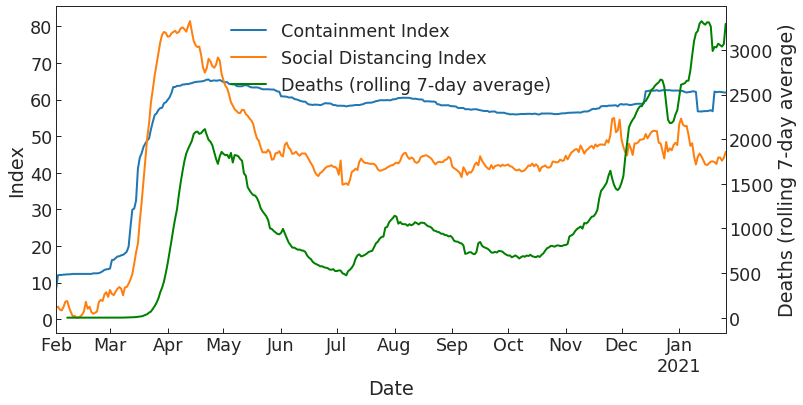

In [10]:
# Plot mean SDI, Containment, and Infectivity over all US states

merged_dat['dtDate'] = pd.to_datetime(merged_dat['Date'])

dt = '2021-01-26'
merged_dat_rest = merged_dat.loc[merged_dat['Date'] <= dt]
#newdeaths_past7_pc_normed_rest = newdeaths_past7_pc_normed.loc[newdeaths_past7_pc_normed.index <= dt]

fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.tick_params(axis='x', which='minor', width=0.0)
ax2 = ax.twinx() 
merged_dat_rest.groupby('dtDate')['ContainmentHealthIndex'].mean().plot(ax=ax, linewidth=2)
merged_dat_rest.groupby(['dtDate'])['shadow_index_normalized'].mean().plot(ax=ax, linewidth=2)
merged_dat_rest.groupby('dtDate')['deathIncrease'].sum().rolling(7).mean().plot(ax=ax2, linewidth=2, color='g')
#merged_dat_rest.groupby('Date')['deathIncrease'].sum().plot(ax=ax2, linewidth=2, color='g')
#ax2.set_ylim(0,0.03)
h,l = ax.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax.legend(h+h2, ['Containment Index', 'Social Distancing Index', 'Deaths (rolling 7-day average)'], frameon=False, loc='upper center')
ax2.set_ylabel('Deaths (rolling 7-day average)')
ax.set_ylabel('Index')
ax.set_xlabel('Date')

plt.savefig('us_mean_timeseries.eps', bbox_inches='tight')

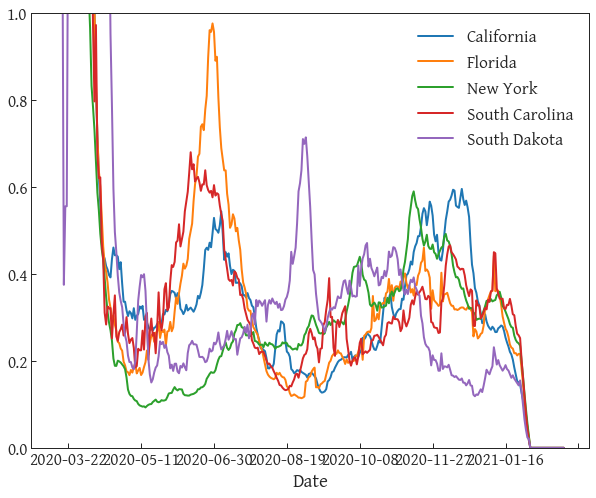

In [136]:
state_subset = ['California', 'Florida', 'New York', 'South Carolina', 'South Dakota']

fig,ax = plt.subplots(1,1, figsize=(10,8))
merged_dat.loc[merged_dat['statename'].isin(state_subset)].groupby(['Date', 'statename'])['infectivity'].mean().unstack().plot(ax=plt.gca(), linewidth=2)
ax.set_ylim(0,1)
ax.legend(frameon=False, title='')

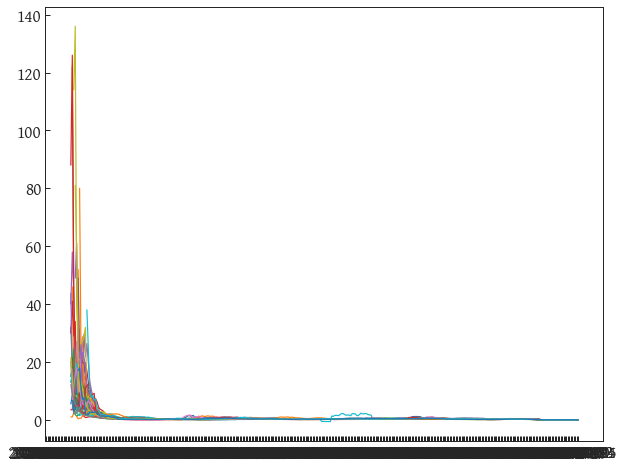

In [126]:
fig,ax = plt.subplots(1,1, figsize=(10,8))

for state in merged_dat['statename'].unique():
    ss = merged_dat.loc[merged_dat['statename'] == state]
    plt.plot(ss['Date'], ss['infectivity'])
    
    .reset_index(drop=True).set_index(['CountryName','Date'])
    
    final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())


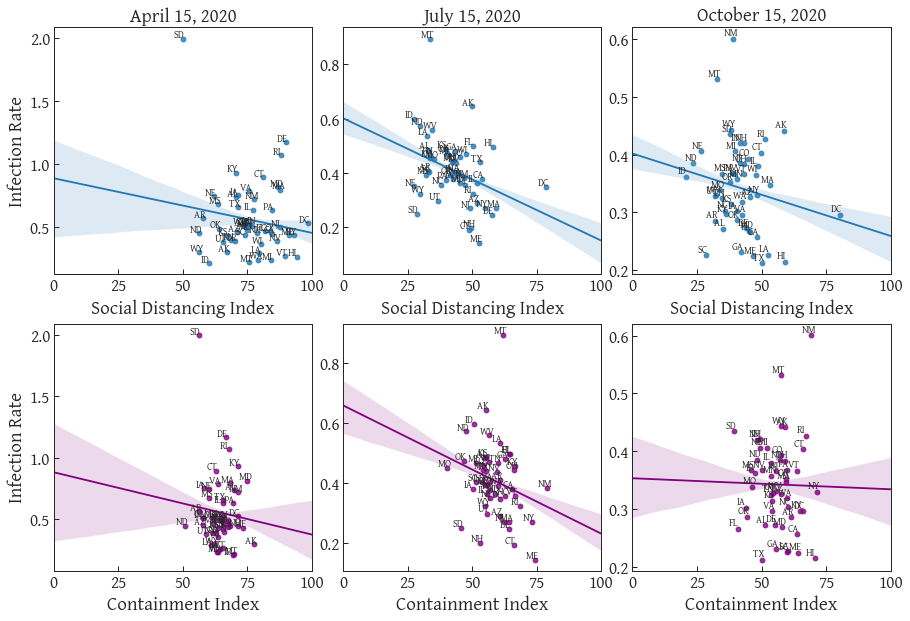

In [96]:
### READY FOR FINAL PLOT @SHERIDAN GREEN

dates_to_plot = ['2020-04-15', '2020-07-15', '2020-10-15']
date_labels = ['April 15, 2020', 'July 15, 2020', 'October 15, 2020']
colors = ['tab:blue', 'purple']
outcome_measure = 'infectivity'
input_measures = ['shadow_index_normalized', 'ContainmentHealthIndex']
input_measures_lab = ['Social Distancing Index', 'Containment Index']

fig,axs = plt.subplots(len(input_measures), len(dates_to_plot), figsize=(15,10), gridspec_kw={'wspace':0.12})
for i_date,date in enumerate(dates_to_plot):
  for i_input,input in enumerate(input_measures):
    merged_dat_subset = merged_dat.loc[merged_dat['Date']==date]
    axs[i_input][i_date].set_xlim(0,100)
    if i_input==0:
      axs[i_input][i_date].set_title(date_labels[i_date])
    sns.regplot(data=merged_dat.loc[merged_dat['Date']==date], x=input, y=outcome_measure, 
                ax=axs[i_input][i_date], truncate=False, color=colors[i_input], ci=50)
    for dp in merged_dat.loc[merged_dat['Date']==date].iterrows():
      axs[i_input][i_date].text(dp[1][input] - 3.5, dp[1][outcome_measure] + 0.005, dp[1]['stateabbrev'])
    axs[i_input][i_date].set_xlabel(input_measures_lab[i_input])
    if(i_date == 0):
        axs[i_input][i_date].set_ylabel('Infection Rate')
    else:
        axs[i_input][i_date].set_ylabel('')
    #axs[i_input][i_date].scatter(merged_dat.loc[merged_dat['Date']==date,input], merged_dat.loc[merged_dat['Date']==date,outcome_measure])
plt.savefig('../figures/sdi_containment_vs_infection.pdf', bbox_inches='tight')

In [72]:
merged_dat['month'] = (pd.to_datetime(merged_dat['Date'])).dt.to_period('M').astype(str)
print(merged_dat['month'].value_counts())

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt']

regression_controls = [
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + ContainmentHealthIndex', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + ContainmentHealthIndex + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
for outcome in outcome_vars:
  all_res = []
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month)', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + ContainmentHealthIndex', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + shadow_index_normalized', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + ContainmentHealthIndex + shadow_index_normalized + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  base = all_res[0]
  print(summary_col(all_res, regressor_order=['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc'], 
                    drop_omitted=True, stars=True, 
                    info_dict={'N': lambda x:(x.nobs), 'R2':lambda x:(x.rsquared), 'Adj.R2':lambda x:(x.rsquared_adj), 
                              'F':lambda x:(anova_lm(base, x).iloc[1]['F'])}))

2020-08    1581
2020-07    1581
2020-05    1581
2021-01    1581
2020-12    1581
2020-10    1581
2020-03    1581
2020-04    1530
2020-11    1530
2020-06    1530
2020-09    1530
2020-02    1479
2021-02    1275
Name: month, dtype: int64

                        infectivity I infectivity II infectivity III infectivity IIII infectivity IIIII
-------------------------------------------------------------------------------------------------------
ContainmentHealthIndex                -0.0795***                                      -0.0445***       
                                      (0.0183)                                        (0.0125)         
shadow_index_normalized                              -0.0945***                       -0.0919***       
                                                     (0.0204)                         (0.0204)         
newcases_past14_pc                                                   35.5557***       143.3310***      
                                     


                        newcases_past7_WoWgrowth_lead7 I newcases_past7_WoWgrowth_lead7 II newcases_past7_WoWgrowth_lead7 III newcases_past7_WoWgrowth_lead7 IIII newcases_past7_WoWgrowth_lead7 IIIII
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ContainmentHealthIndex                                   -0.1601***                                                                                               -0.0912***                          
                                                         (0.0245)                                                                                                 (0.0177)                            
shadow_index_normalized                                                                    -0.1129***                                                             -0.0861***                          
    


                        newdeaths_past7_WoWgrowth_lead21 I newdeaths_past7_WoWgrowth_lead21 II newdeaths_past7_WoWgrowth_lead21 III newdeaths_past7_WoWgrowth_lead21 IIII newdeaths_past7_WoWgrowth_lead21 IIIII
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ContainmentHealthIndex                                     -0.0732***                                                                                                     -0.0470***                            
                                                           (0.0107)                                                                                                       (0.0092)                              
shadow_index_normalized                                                                        -0.0459***                                                          

In [73]:
### results_df is final table of all F-tests, p-values, etc.


merged_dat['month'] = (pd.to_datetime(merged_dat['Date'])).dt.to_period('M').astype(str)
print(merged_dat['month'].value_counts())

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt']

regression_controls_SDI = [
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + ContainmentHealthIndex', 
                       'C(statefips) + C(month) + ContainmentHealthIndex + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
reg_SDI_desc = [
                'State, month FEs',
                'State, month FEs + 14-,21-,28-day cumulative cases per capita',
                'State, month FEs + Containment',
                'State, month FEs + Containment + 14-,21-,28-day cumulative cases per capita'
]

results_df = None

for outcome in outcome_vars:
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  for i_spec,reg_spec in enumerate(regression_controls_SDI):
    base = smf.ols(formula=outcome + ' ~ ' + reg_spec, data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    addl = smf.ols(formula=outcome + ' ~ ' + reg_spec + ' + shadow_index_normalized', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    # print('----------------- ', reg_spec)
    # print('Rsq: ', base.rsquared, addl.rsquared)
    # print(addl.params['shadow_index_normalized'])
    # print(addl.conf_int(0.05).loc['shadow_index_normalized'])
    # print(addl.compare_f_test(base))
    row = {
        'Outcome': outcome,
        'Controls': reg_SDI_desc[i_spec],
        'Estimate': addl.params['shadow_index_normalized'],
        'Estimate_95CI_lower': addl.conf_int(0.05).loc['shadow_index_normalized'][0],
        'Estimate_95CI_upper': addl.conf_int(0.05).loc['shadow_index_normalized'][1],
        'R_sq_excluding': base.rsquared,
        'R_sq_including': addl.rsquared,
        'F_stat': addl.compare_f_test(base)[0],
        'F_stat_pvalue': addl.compare_f_test(base)[1]
    }
    for key in row.keys():
      row[key] = [row[key]]
    newrow_df = pd.DataFrame.from_dict(row)
    if results_df is None:
      results_df = newrow_df
    else:
      results_df = pd.concat([results_df, newrow_df])

print(results_df)
    

2020-08    1581
2020-07    1581
2020-05    1581
2021-01    1581
2020-12    1581
2020-10    1581
2020-03    1581
2020-04    1530
2020-11    1530
2020-06    1530
2020-09    1530
2020-02    1479
2021-02    1275
Name: month, dtype: int64


/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F tes

/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F tes

                            Outcome  \
0                       infectivity   
0                       infectivity   
0                       infectivity   
0                       infectivity   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0                 infectivity_lead7   
0                 infectivity_lead7   
0                 infectivity_lead7   
0                 infectivity_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0                        

/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5]


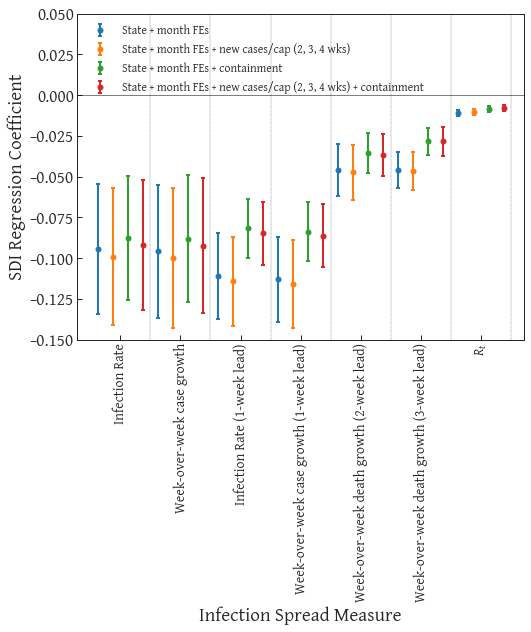

In [78]:
outcome_names = ['Infection Rate', 'Week-over-week case growth', 'Infection Rate (1-week lead)', 
                 'Week-over-week case growth (1-week lead)', 'Week-over-week death growth (2-week lead)', 
                 'Week-over-week death growth (3-week lead)', r'$R_t$']

labs = ['State + month FEs', 'State + month FEs + new cases/cap (2, 3, 4 wks)', 'State + month FEs + containment',
       'State + month FEs + new cases/cap (2, 3, 4 wks) + containment']

fig=plt.figure(figsize=(8,6))
ax = plt.gca()

xvals = range(len(results_df))
yvals = results_df['Estimate'].values
errs = results_df['Estimate_95CI_upper'].values - results_df['Estimate'].values

cols = sns.color_palette()[0:4]

for i in range(len(xvals)):
    if(i < 4):
        plt.errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10, label=labs[i])
    else:
        plt.errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10)

#plt.errorbar(range(len(results_df)), results_df['Estimate'], 
#             yerr=results_df['Estimate_95CI_upper'] - results_df['Estimate'],
#             marker='.', ls='', capsize=2)
new_ticks = [(len(regression_controls_SDI)-1)/2 + len(regression_controls_SDI)*i for i in range(len(outcome_vars))]
print(new_ticks)
plt.xticks(new_ticks, labels=outcome_vars, rotation=90)
plt.ylim(-0.15, 0.05)
plt.axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  plt.axvline(t + len(regression_controls_SDI)/2, linewidth=0.25, ls='--', color='black')

ax.set_ylabel(r'SDI Regression Coefficient')
ax.set_xlabel(r'Infection Spread Measure')
ax.set_xticklabels(outcome_names, fontsize=14)

ax.legend(fontsize=12, frameon=False)

#plt.title('Effect of Social Distancing Index on Measures of Covid-19 Spread')

plt.savefig('../figures/sdi_coefficient.eps', bbox_inches='tight')

# Are these 95% confidence intervals? Is the Rt coefficient much smaller due to units? Or just due to the scale of change
# of the quantity over the time period of interest?

In [79]:
### results_df is final table of all F-tests, p-values, etc.

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt']

regression_controls_Containment = [
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + shadow_index_normalized', 
                       'C(statefips) + C(month) + shadow_index_normalized + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
reg_Containment_desc = [
                'State, month FEs',
                'State, month FEs + Containment',
                'State, month FEs + 14-,21-,28-day cumulative cases per capita',
                'State, month FEs + Containment + 14-,21-,28-day cumulative cases per capita'
]

results_Containment_df = None

for outcome in outcome_vars:
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  for i_spec,reg_spec in enumerate(regression_controls_Containment):
    base = smf.ols(formula=outcome + ' ~ ' + reg_spec, data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    addl = smf.ols(formula=outcome + ' ~ ' + reg_spec + ' + ContainmentHealthIndex', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    # print('----------------- ', reg_spec)
    # print('Rsq: ', base.rsquared, addl.rsquared)
    # print(addl.params['shadow_index_normalized'])
    # print(addl.conf_int(0.05).loc['shadow_index_normalized'])
    # print(addl.compare_f_test(base))
    row = {
        'Outcome': outcome,
        'Controls': reg_SDI_desc[i_spec],
        'Estimate': addl.params['ContainmentHealthIndex'],
        'Estimate_95CI_lower': addl.conf_int(0.05).loc['ContainmentHealthIndex'][0],
        'Estimate_95CI_upper': addl.conf_int(0.05).loc['ContainmentHealthIndex'][1],
        'R_sq_excluding': base.rsquared,
        'R_sq_including': addl.rsquared,
        'F_stat': addl.compare_f_test(base)[0],
        'F_stat_pvalue': addl.compare_f_test(base)[1]
    }
    for key in row.keys():
      row[key] = [row[key]]
    newrow_df = pd.DataFrame.from_dict(row)
    if results_Containment_df is None:
      results_Containment_df = newrow_df
    else:
      results_Containment_df = pd.concat([results_Containment_df, newrow_df])

print(results_Containment_df)
    

/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F tes

/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F tes

                            Outcome  \
0                       infectivity   
0                       infectivity   
0                       infectivity   
0                       infectivity   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0          newcases_past7_WoWgrowth   
0                 infectivity_lead7   
0                 infectivity_lead7   
0                 infectivity_lead7   
0                 infectivity_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0    newcases_past7_WoWgrowth_lead7   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead14   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0  newdeaths_past7_WoWgrowth_lead21   
0                        

/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/sbg/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2167: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5]


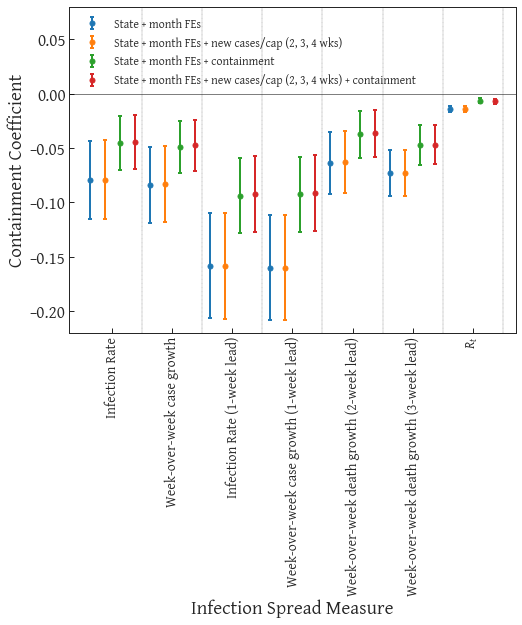

In [84]:
plt.figure(figsize=(8,6))
ax = plt.gca()

xvals = range(len(results_Containment_df))
yvals = results_Containment_df['Estimate'].values
errs = results_Containment_df['Estimate_95CI_upper'].values - results_Containment_df['Estimate'].values

cols = sns.color_palette()[0:4]

for i in range(len(xvals)):
    if(i < 4):
        plt.errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10, label=labs[i])
    else:
        plt.errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10)

new_ticks = [(len(regression_controls_Containment)-1)/2 + len(regression_controls_Containment)*i for i in range(len(outcome_vars))]
print(new_ticks)
plt.xticks(new_ticks, labels=outcome_vars, rotation=90)
plt.ylim(-0.22, 0.08)
plt.axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  plt.axvline(t + len(regression_controls_Containment)/2, linewidth=0.25, ls='--', color='black')

ax.set_ylabel(r'Containment Coefficient')
ax.set_xlabel(r'Infection Spread Measure')
ax.set_xticklabels(outcome_names, fontsize=14)

ax.legend(fontsize=12, frameon=False)

plt.savefig('../figures/containment_coefficient.eps', bbox_inches='tight')


#plt.title('Effect of Containment on Measures of Covid-19 Spread')

# Could make this a 2x1 or 1x2 plot with SDI and use the same legend for both?

In [118]:
sns.color_palette('Blues', 4)

[(0.8141176470588235, 0.883921568627451, 0.9498039215686275),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.09019607843137256, 0.39294117647058824, 0.6705882352941177)]

[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5]


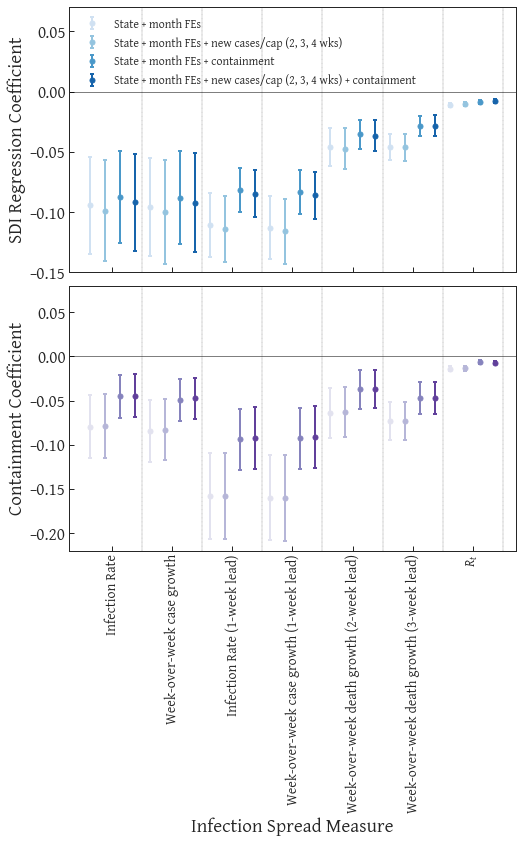

In [122]:
outcome_names = ['Infection Rate', 'Week-over-week case growth', 'Infection Rate (1-week lead)', 
                 'Week-over-week case growth (1-week lead)', 'Week-over-week death growth (2-week lead)', 
                 'Week-over-week death growth (3-week lead)', r'$R_t$']

labs = ['State + month FEs', 'State + month FEs + new cases/cap (2, 3, 4 wks)', 'State + month FEs + containment',
       'State + month FEs + new cases/cap (2, 3, 4 wks) + containment']

fig,ax=plt.subplots(2,1,figsize=(8,10),sharex=True, gridspec_kw={'hspace':0.05})

xvals = range(len(results_df))
yvals = results_df['Estimate'].values
errs = results_df['Estimate_95CI_upper'].values - results_df['Estimate'].values

cols = sns.color_palette('Blues', 4)

for i in range(len(xvals)):
    if(i < 4):
        ax[0].errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10, label=labs[i])
    else:
        ax[0].errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10)
        
xvals = range(len(results_Containment_df))
yvals = results_Containment_df['Estimate'].values
errs = results_Containment_df['Estimate_95CI_upper'].values - results_Containment_df['Estimate'].values

cols = sns.color_palette('Purples', 4)

for i in range(len(xvals)):
    if(i < 4):
        ax[1].errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10, label=labs[i])
    else:
        ax[1].errorbar([xvals[i]], [yvals[i]], yerr=[errs[i]], marker='.', ls='', capsize=2, color=cols[i % 4],
                    linewidth=2, capthick=2, markersize=10)

#plt.errorbar(range(len(results_df)), results_df['Estimate'], 
#             yerr=results_df['Estimate_95CI_upper'] - results_df['Estimate'],
#             marker='.', ls='', capsize=2)
new_ticks = [(len(regression_controls_SDI)-1)/2 + len(regression_controls_SDI)*i for i in range(len(outcome_vars))]
print(new_ticks)
ax[1].set_xticks(new_ticks)
ax[1].set_xticklabels(outcome_vars, rotation=90)
ax[1].set_ylim(-0.22, 0.08)
ax[0].set_ylim(-0.15, 0.07)
ax[0].axhline(0, color='black', linewidth=0.5)
ax[1].axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  ax[0].axvline(t + len(regression_controls_SDI)/2, linewidth=0.25, ls='--', color='black')
  ax[1].axvline(t + len(regression_controls_SDI)/2, linewidth=0.25, ls='--', color='black')

ax[0].set_ylabel(r'SDI Regression Coefficient')
ax[1].set_ylabel(r'Containment Coefficient')
ax[1].set_xlabel(r'Infection Spread Measure')
ax[1].set_xticklabels(outcome_names, fontsize=14)


leg = ax[0].legend(fontsize=12, frameon=False)

#plt.title('Effect of Social Distancing Index on Measures of Covid-19 Spread')

plt.savefig('../figures/sdi_containment_coefficients.eps', bbox_inches='tight')

[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5]


Text(0.5, 1.0, 'Effect of Containment on Measures of Covid-19 Spread')

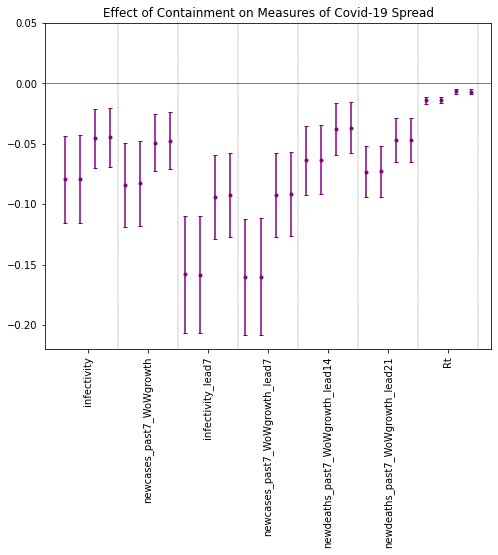

In [ ]:
### READY FOR FINAL PLOT @Sheridan Green
# May need some messing around with explaining the four points

plt.figure(figsize=(8,6))
plt.errorbar(range(len(results_Containment_df)), results_Containment_df['Estimate'], 
             yerr=results_Containment_df['Estimate_95CI_upper'] - results_Containment_df['Estimate'],
             marker='.', ls='', capsize=2, color='purple')
new_ticks = [(len(regression_controls_Containment)-1)/2 + len(regression_controls_Containment)*i for i in range(len(outcome_vars))]
print(new_ticks)
plt.xticks(new_ticks, labels=outcome_vars, rotation=90)
plt.ylim(-0.22, 0.05)
plt.axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  plt.axvline(t + len(regression_controls_Containment)/2, linewidth=0.25, ls='--', color='black')

plt.title('Effect of Containment on Measures of Covid-19 Spread')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


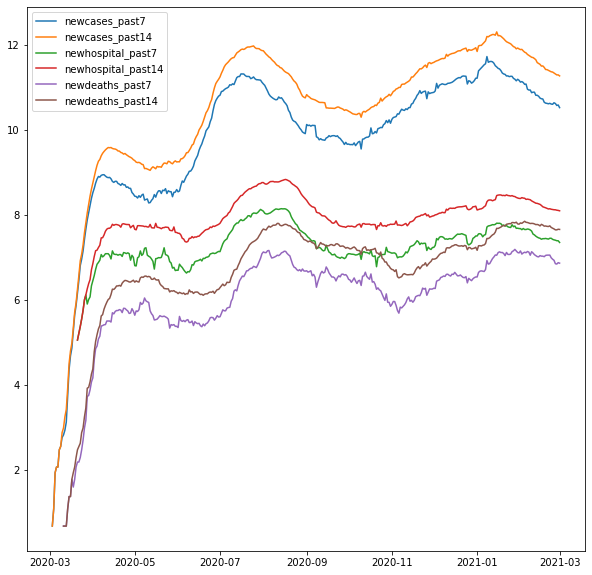

      hospitalizedIncrease  newhospital_past7  newhospital_past14
3160                   0.0                0.0                 0.0
3161                   0.0                0.0                 0.0
3162                   0.0                0.0                 0.0
3163                   0.0                0.0                 0.0
3164                   0.0                0.0                 0.0
3165                   0.0                0.0                 0.0
3166                   0.0                0.0                 0.0
3167                   0.0                0.0                 0.0
3168                   0.0                0.0                 0.0
3169                   0.0                0.0                 0.0
3170                   0.0                0.0                 0.0
3171                   0.0                0.0                 0.0
3172                   0.0                0.0                 0.0
3173                   0.0                0.0                 0.0
3174      

In [ ]:
### OUTDATED

fips_bucket = [6, 12]
plt.figure(figsize=(10,10))
s = dat.loc[dat['statefips']==fips_bucket[1]]
to_plot = ['newcases_past7', 'newcases_past14', 'newhospital_past7', 'newhospital_past14', 'newdeaths_past7', 'newdeaths_past14']
plt.plot(pd.to_datetime(s['date']), np.log(s[to_plot]))
plt.legend(to_plot)
plt.show()
print(s[['hospitalizedIncrease', 'newhospital_past7', 'newhospital_past14']].head(50))

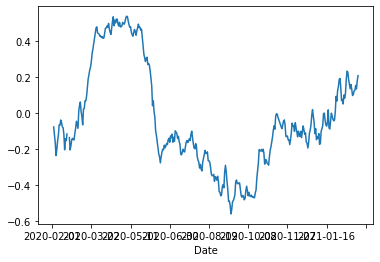

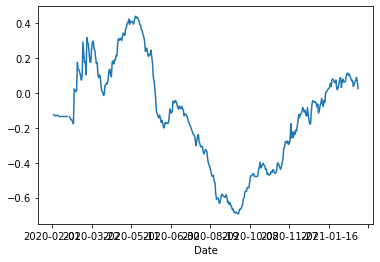

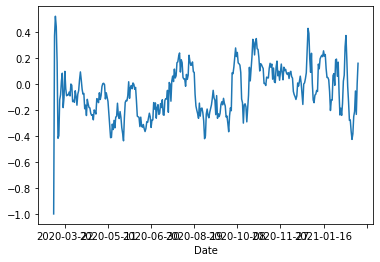

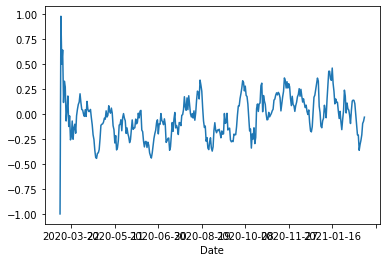

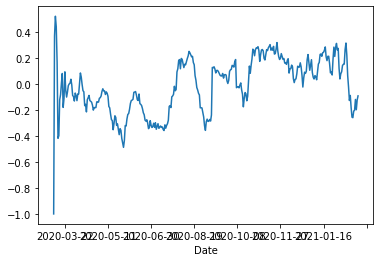

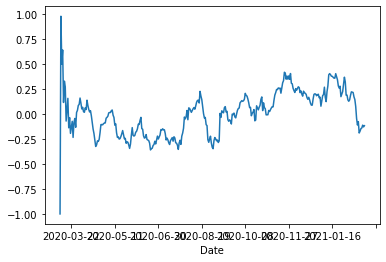

In [ ]:
### EXPLORE CORRELATIONS OVER TIME, OUTDATED

#plt.figure(figsize=(10,10))
#merged_dat.groupby(['Date', 'statename'])['newcases_past7_pc'].mean().unstack().plot(ax=plt.gca())
plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_pc', 'shadow_index_normalized']].corr().unstack()['newcases_past7_pc']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_pc', 'ContainmentHealthIndex']].corr().unstack()['newcases_past7_pc']['ContainmentHealthIndex'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_WoWgrowth', 'shadow_index_normalized']].corr().unstack()['newcases_past7_WoWgrowth']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_WoWgrowth', 'ContainmentHealthIndex']].corr().unstack()['newcases_past7_WoWgrowth']['ContainmentHealthIndex'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['infectivity', 'shadow_index_normalized']].corr().unstack()['infectivity']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['infectivity', 'ContainmentHealthIndex']].corr().unstack()['infectivity']['ContainmentHealthIndex'].plot()

# plt.figure()
# merged_dat.groupby(['Date'])[['newcases_past7_pc', 'adherence_ratio']].corr().unstack()['newcases_past7_pc']['adherence_ratio'].plot()

# plt.figure()
# merged_dat.groupby(['Date'])[['newcases_past7_pc', 'adherence_gap']].corr().unstack()['newcases_past7_pc']['adherence_gap'].plot()